## COMP5625M Practical Assessment - Deep Learning [100 Marks]


<div class="logos"><img src="Comp5625M_logo.jpg" width="220px" align="right"></div>

This assessment is divided into two parts:
> 1. Image classification using DNN and CNN [70 Marks]
> 2. Use of RNN to predict texts for image captioning [30 Marks]

The maximum number of marks for each part is shown in the section headers. As indicated in the main heading above, the overall assessment carries a maximum of 100 marks.

This summative assessment is weighted 50% of the final grade for the module.


### Motivation 

Through this coursework, you will:

> 1. Understand and implement your first deep neural network and convolutional neural network (CNN) and see how these can be used for classification problem 
> 2. Practice building, evaluating, and finetuning your CNN on an image dataset from development to testing stage. 
> 3. You will learn to tackle overfitting problem using strategies such as data augmentation and drop out.
> 4. Compare your model performance and accuracy with others, such as the leaderboard on Kaggle
> 5. Use RNNs to predict the caption of an image from established word vocabularies
> 6. Understand and visualise text predictions for a given image.


### Setup and resources 

You must work using this provided template notebook.

Having a GPU will speed up the training process. See the provided document on Minerva about setting up a working environment for various ways to access a GPU.

Please implement the coursework using **Python and PyTorch**, and refer to the notebooks and exercises provided.


### Submission

Please submit the following:

> 1. Your completed Jupyter notebook file, without removing anything in the template, in **.ipynb format.**
> 2. The **.html version** of your notebook; File > Download as > HTML (.html). Check that all cells have been run and all outputs (including all graphs you would like to be marked) displayed in the .html for marking.
> 3. Your selected image from section 2.4.2 "Failure analysis"

Final note:

> **Please display everything that you would like to be marked. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


Your student username (for example, ```sc15jb```): 

--> mm23can

Your full name: 

--> Crish Ajay Nagarkar

### Part I: Image Classification [70 marks]

#### Dataset
This coursework will use a subset of images from Tiny ImageNet, which is a subset of the [ImageNet dataset](https://www.image-net.org/update-mar-11-2021.php). Our subset of Tiny ImageNet contains **30 different categories**, we will refer to it as TinyImageNet30. The training set has 450 resized images (64x64 pixels) for each category (13,500 images in total). You can download the training and test set from the Kaggle website:

>[Direct access of data is possible by clicking here, please use your university email to access this](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/ESF87mN6kelIkjdISkaRow8BublW27jB-P8eWV6Rr4rxtw?e=SPASDB)

>[To submit your results on the Kaggle competition. You can also access data here](https://www.kaggle.com/t/9105198471a3490d9057026d27d8a711)

To access the dataset, you will need an account on the Kaggle website. Even if you have an existing Kaggle account, please carefully adhere to these instructions, or we may not be able to locate your entries:

> 1. Use your **university email** to register a new account.
> 2. Set your **Kaggle account NAME** to your university username, for example, ``sc15jb`` (see the ``note`` below)

``Note:`` If the name is already taken in the Kaggle then please use a similar pseudo name and add a note in your submission with the name you have used in the Kaggle. 

#### Submitting your test result to Kaggle leaderboard 
The class Kaggle competition also includes a blind test set, which will be used in Question 1 for evaluating your custom model's performance on a test set. The competition website will compute the test set accuracy, as well as position your model on the class leaderboard. More information is provided in the related section below.


## Required packages

[1] [numpy](http://www.numpy.org) is package for scientific computing with python

[2] [h5py](http://www.h5py.org) is package to interact with compactly stored dataset

[3] [matplotlib](http://matplotlib.org) can be used for plotting graphs in python

[4] [pytorch](https://pytorch.org/docs/stable/index.html) is library widely used for bulding deep-learning frameworks

Feel free to add to this section as needed some examples for importing some libraries is provided for you below.

You may need to install these packages using [pip](https://pypi.org/project/opencv-python/) or [conda](https://anaconda.org/conda-forge/opencv).

In [3]:
!pip install opencv-python

In [4]:
!pip install torch

In [5]:
!pip install torch torchvision pillow matplotlib

In [22]:
import cv2
import math
import os

import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.hub import load_state_dict_from_url

from PIL import Image
import matplotlib.pyplot as plt
import torch.utils.data as data
import torch.optim as optim

In [17]:
# always check your version
print(torch.__version__)
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print('Using device:', device)

2.2.1
Using device: mps


One challenge of building a deep learning model is to choose an architecture that can learn the features in the dataset without being unnecessarily complex. The first part of the coursework involves building a CNN and training it on TinyImageNet30. 

### **Overview of image classification:**

**1. Function implementation** [14 marks]

*   **1.1** PyTorch ```Dataset``` and ```DataLoader``` classes (4 marks)
*   **1.2** PyTorch ```Model``` class for a simple MLP model (4 marks)
*   **1.3** PyTorch ```Model``` class for a simple CNN model (6 marks)

**2. Model training** [30 marks]
*   **2.1** Training on TinyImageNet30 dataset (6 marks)
*   **2.2** Generating confusion matrices and ROC curves (6 marks)
*   **2.3** Strategies for tackling overfitting (18 marks)
    *   **2.3.1** Data augmentation
    *   **2.3.2** Dropout
    *   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)
            
**3. Model testing** [10 marks]
*   **3.1**   Testing your final model in (2) on test set - code to do this (4 marks)
*   **3.2**   Uploading your result to Kaggle  (6 marks)

**4. Model Fine-tuning on CIFAR10 dataset** [16 marks]
*   **4.1** Fine-tuning your model (initialise your model with pretrained weights from (2)) (6 marks)
*   **4.2** Fine-tuning model with frozen base convolution layers (6 marks)
*   **4.3** Compare complete model retraining with pretrained weights and with frozen layers. Comment on what you observe. (4 marks) 


<!-- **5. Model comparison** [16 marks]
*   **5.1**   Load pretrained AlexNet and finetune on TinyImageNet30 until model convergence (8 marks)
*   **5.2**   Compare the results of your model with pretrained AlexNet on the same validation set. Provide performance values (loss graph, confusion matrix, top-1 accuracy, execution time) (8 marks) -->
<!-- 
**6. Interpretation of results** (14 marks)
*   **6.1** Implement grad-CAM for your model and AlexNet (6 marks)
*   **6.2** Visualise and compare your results from your model and AlexNet (4 marks)
*   **6.3** Provide comment on (4 marks)
    - why the network predictions were correct or not correct in your predictions? 
    - what can you do to improve your results further?

**7. Residual connection for deeper network** (9 marks)
*   **7.1** Implement a few residual layers in AlexNet and retrain on TinyImageNet30. You can change network size if you wish. (6 marks)
*   **7.2** Comment on why such connections are important and why this impacted your results in terms of loss and accuracy (if it did!) (3 marks)

**Quality of your report** (2 marks) -->


## 1 Function implementations [14 marks]


### 1.1 Dataset class (4 marks)

Write a PyTorch ```Dataset``` class (an example [here](https://www.askpython.com/python-modules/pytorch-custom-datasets) for reference) which loads the TinyImage30 dataset and ```DataLoaders``` for training and validation sets.

In [18]:
root_directory = '/Users/crishnagarkar/comp5625m-artificial-intelligence-2024/'
data_path = root_directory + 'train_set/train_set/train_set/'
result_path = root_directory + 'assignment_results/'

# make these directories if not available
# --> this will avoid you from downloading the data again and again
os.makedirs(data_path, exist_ok=True)
os.makedirs(result_path, exist_ok=True)
/Users/crishnagarkar/comp5625m-artificial-intelligence-2024/

In [40]:
class TinyImageNet30Dataset(data.Dataset):
    def __init__(self, root_dir, class_labels, transform=None):
        self.root_dir = root_dir
        self.img_paths = []
        self.img_labels = []
        self.class_labels = class_labels
        self.transform = transform

        # Iterate over all classes
        for i, c in enumerate(class_labels):
            class_directory = os.path.join(root_dir, c)
            if os.path.isdir(class_directory):
                # Add all images in this class directory to the dataset
                for img_name in os.listdir(class_directory):
                    img_path = os.path.join(class_directory, img_name)
                    self.img_paths.append(img_path)
                    self.img_labels.append(i)

    def __getitem__(self, index):
        # Load the image at the given index
        img_path = self.img_paths[index]
        image = Image.open(img_path).convert('RGB')

        # Apply the specified image transformations
        if self.transform:
            image = self.transform(image)

        # Convert label to tensor
        label = torch.tensor(self.img_labels[index], dtype=torch.long)

        return image, label

    def __len__(self):
        # Return the previously computed number of images
        return len(self.img_paths)

In [20]:
from torch.utils.data import DataLoader, random_split

# load the dataset
train_set_root = '/Users/crishnagarkar/comp5625m-artificial-intelligence-2024/train_set/train_set/train_set'

# load the classes
file = open("/Users/crishnagarkar/comp5625m-artificial-intelligence-2024/class.txt", "r")
class_contents = []
for line in file.readlines():
    cur_line = line.strip().split("\t")
    class_contents.append(cur_line[:])
class_labels = [items[1] for items in class_contents]
print('classes:', class_labels)

batch_size = 64

# Create the dataset
tiny_dataset = TinyImageNet30Dataset(root_dir=train_set_root, class_labels=class_labels)
dataloader = DataLoader(tiny_dataset, batch_size=batch_size, shuffle=True)

classes: ['baboon', 'banana', 'bee', 'bison', 'butterfly', 'candle', 'cardigan', 'chihuahua', 'elephant', 'espresso', 'fly', 'goldfish', 'goose', 'grasshopper', 'hourglass', 'icecream', 'ipod', 'jellyfish', 'koala', 'ladybug', 'lion', 'mushroom', 'penguin', 'pig', 'pizza', 'pretzel', 'redpanda', 'refrigerator', 'sombrero', 'umbrella']


### 1.2 Define a MLP model class (4 marks)

<u>Create a new model class using a combination of:</u>
- Input Units
- Hidden Units
- Output Units
- Activation functions
- Loss function
- Optimiser

In [ ]:
# TO COMPLETE
# define a MLP Model class

In [23]:
# TO COMPLETE

# define a MLP Model class
class MLPModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLPModel, self).__init__()
        self.fc_layer1 = nn.Linear(input_dim, hidden_dim)
        self.relu_activation1 = nn.ReLU()
        self.fc_layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.relu_activation2 = nn.ReLU()
        self.fc_layer3 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        x = self.fc_layer1(x)
        x = self.relu_activation1(x)
        x = self.fc_layer2(x)
        x = self.relu_activation2(x)
        x = self.fc_layer3(x)
        return x

# Define the input, hidden, and output sizes
input_dim = 3 * 64 * 64  # (channel * height * width)
hidden_dim = 128
output_dim = 30  # 30 classes

# Create the MLP model
mlp_model = MLPModel(input_dim, hidden_dim, output_dim).to(device)

# Define the loss function and optimizer
mlp_loss_fn = nn.CrossEntropyLoss()
mlp_optimizer = optim.SGD(mlp_model.parameters(), lr=0.01)


### 1.3 Define a CNN model class (6 marks)

<u>Create a new model class using a combination of:</u>
- Convolution layers
- Activation functions (e.g. ReLU)
- Maxpooling layers
- Fully connected layers 
- Loss function
- Optimiser

*Please note that the network should be at least a few layers for the model to perform well.*

In [24]:
class CNNModel(nn.Module):
    def __init__(self, num_classes=30):
        super(CNNModel, self).__init__()
        self.conv_layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.conv_layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.conv_layer3 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.flatten_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 8 * 8, 512)
        )
        self.relu_activation1 = nn.ReLU()
        self.fc_layer1 = nn.Linear(512, 1024)
        self.relu_activation2 = nn.ReLU()
        self.fc_layer2 = nn.Linear(1024, num_classes)

    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.conv_layer2(out)
        out = self.conv_layer3(out)
        out = self.flatten_layer(out)
        out = self.relu_activation1(out)
        out = self.fc_layer1(out)
        out = self.relu_activation2(out)
        out = self.fc_layer2(out)
        return out

def build_cnn_model(cnn_model, learning_rate):
    num_classes = 30
    # Set up the model, loss function, and optimizer
    cnn_model_instance = cnn_model(num_classes=num_classes).to(device)
    cnn_loss_fn = nn.CrossEntropyLoss()
    cnn_optimizer = optim.SGD(cnn_model_instance.parameters(), lr=learning_rate, momentum=0.9)
    return cnn_model_instance, cnn_loss_fn, cnn_optimizer

In [25]:
# TO COMPLETE
# define a CNN Model class

## 2 Model training [30 marks]


### 2.1 Train both MLP and CNN model - show loss and accuracy graphs side by side (6 marks)

Train your model on the TinyImageNet30 dataset. Split the data into train and validation sets to determine when to stop training. Use seed at 0 for reproducibility and test_ratio=0.2 (validation data)

Display the graph of training and validation loss over epochs and accuracy over epochs to show how you determined the optimal number of training epochs. A top-*k* accuracy implementation is provided for you below.

> Please leave the graph clearly displayed. Please use the same graph to plot graphs for both train and validation.


In [26]:
from torch.utils.data import random_split

def split_dataset(dataset):
    # Set seed for reproducibility
    torch.manual_seed(0)

    # Split the dataset into train and validation sets
    validation_ratio = 0.2
    # Split the dataset into training and validation sets
    validation_size = int(validation_ratio * len(dataset))
    training_size = len(dataset) - validation_size
    training_dataset, validation_dataset = random_split(dataset, [training_size, validation_size])

    training_dataloader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
    validation_dataloader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)

    # Get a single batch of data
    train_images, train_labels = next(iter(training_dataloader))
    print('training_dataloader completed:', next(iter(train_images)).shape)  # prints shape of image with single batch

    # Get a single batch of data
    val_images, val_labels = next(iter(validation_dataloader))
    print('validation_dataloader completed:', next(iter(val_images)).shape)  # prints shape of image with single batch

    return training_dataloader, validation_dataloader

training_dataloader, validation_dataloader = split_dataset(tiny_dataset)

training_dataloader completed: torch.Size([3, 64, 64])
validation_dataloader completed: torch.Size([3, 64, 64])


In [27]:
# Define top-*k* accuracy
def topk_accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

In [28]:
# TO COMPLETE --> Running your MLP model class
num_epochs = 30

# Lists to keep track of training/validation loss and accuracy over epochs
training_loss_history = []
validation_loss_history = []
training_acc_history = []
validation_acc_history = []
best_validation_acc = 0.0

# Train model
for epoch in range(num_epochs):
    # Training
    training_loss = 0
    training_acc = 0
    mlp_model.train()
    for train_images, train_labels in training_dataloader:
        train_images = train_images.view(train_images.size(0), -1).to(device)  # Flatten input images
        train_labels = train_labels.to(device)
        mlp_optimizer.zero_grad()
        mlp_outputs = mlp_model(train_images)
        loss = mlp_loss_fn(mlp_outputs, train_labels)
        loss.backward()
        mlp_optimizer.step()
        training_loss += loss.item()
        acc = topk_accuracy(mlp_outputs, train_labels, topk=(1,))[0]
        training_acc += acc.item()
    training_loss /= len(training_dataloader)
    training_acc /= len(training_dataloader)
    training_loss_history.append(training_loss)
    training_acc_history.append(training_acc)

    # Validation
    validation_loss = 0
    validation_acc = 0
    mlp_model.eval()
    with torch.no_grad():
        for val_images, val_labels in validation_dataloader:
            val_images = val_images.view(val_images.size(0), -1).to(device)  # Flatten input images
            val_labels = val_labels.to(device)
            mlp_outputs = mlp_model(val_images)
            loss = mlp_loss_fn(mlp_outputs, val_labels)
            validation_loss += loss.item()
            acc = topk_accuracy(mlp_outputs, val_labels, topk=(1,))[0]
            validation_acc += acc.item()
        validation_loss /= len(validation_dataloader)
        validation_acc /= len(validation_dataloader)
        validation_loss_history.append(validation_loss)
        validation_acc_history.append(validation_acc)

    # Save the model if it has the best validation accuracy so far
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        torch.save(mlp_model.state_dict(), 'best_mlp_model.pth')

    # Print loss and accuracy values for current epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {training_loss:.4f}, Train Acc: {training_acc:.2f}%, Val Loss: {validation_loss:.4f}, Val Acc: {validation_acc:.2f}%')

Epoch [1/30], Train Loss: 3.3839, Train Acc: 6.75%, Val Loss: 3.3605, Val Acc: 7.67%
Epoch [2/30], Train Loss: 3.3118, Train Acc: 10.29%, Val Loss: 3.2667, Val Acc: 10.76%
Epoch [3/30], Train Loss: 3.2019, Train Acc: 12.05%, Val Loss: 3.1653, Val Acc: 11.56%
Epoch [4/30], Train Loss: 3.1157, Train Acc: 13.24%, Val Loss: 3.1091, Val Acc: 12.61%
Epoch [5/30], Train Loss: 3.0482, Train Acc: 14.74%, Val Loss: 3.0609, Val Acc: 12.68%
Epoch [6/30], Train Loss: 2.9949, Train Acc: 15.61%, Val Loss: 3.0231, Val Acc: 13.17%
Epoch [7/30], Train Loss: 2.9472, Train Acc: 17.15%, Val Loss: 2.9641, Val Acc: 15.92%
Epoch [8/30], Train Loss: 2.9098, Train Acc: 17.52%, Val Loss: 2.9495, Val Acc: 16.42%
Epoch [9/30], Train Loss: 2.8767, Train Acc: 18.80%, Val Loss: 2.9115, Val Acc: 17.15%
Epoch [10/30], Train Loss: 2.8470, Train Acc: 19.29%, Val Loss: 2.9333, Val Acc: 16.32%
Epoch [11/30], Train Loss: 2.8242, Train Acc: 20.18%, Val Loss: 2.8896, Val Acc: 18.07%
Epoch [12/30], Train Loss: 2.8033, Train Ac

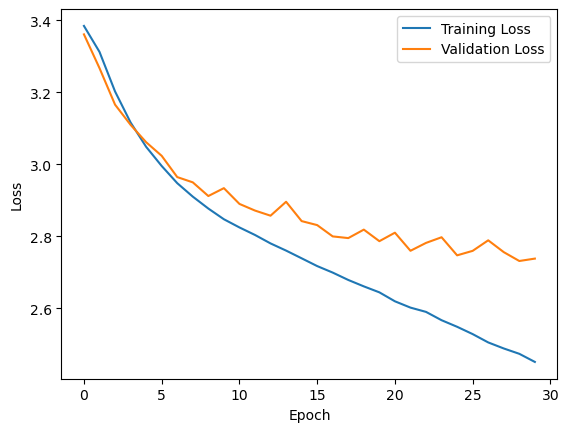

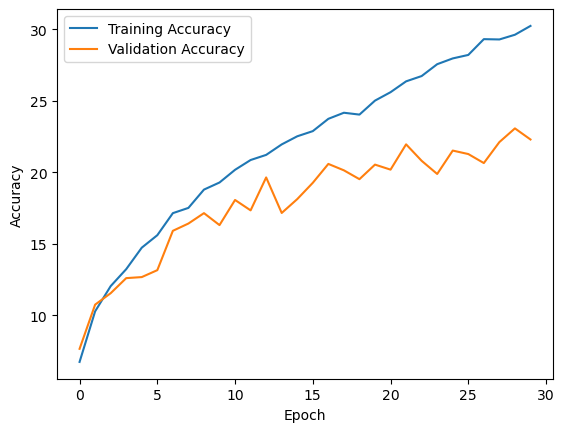

In [29]:
# Your graph
def plot_loss_accuracy(training_loss_history, validation_loss_history, training_acc_history, validation_acc_history):
    # Plot loss and accuracy values over epochs
    plt.plot(training_loss_history, label='Training Loss')
    plt.plot(validation_loss_history, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(training_acc_history, label='Training Accuracy')
    plt.plot(validation_acc_history, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_loss_accuracy(training_loss_history, validation_loss_history, training_acc_history, validation_acc_history)

In [34]:
def build_cnn_model(cnn_model, learning_rate):
    num_classes = 30
    # Set up the model, loss function, and optimizer
    cnn_model_instance = cnn_model(num_classes=num_classes).to(device)
    cnn_loss_fn = nn.CrossEntropyLoss()
    cnn_optimizer = optim.SGD(cnn_model_instance.parameters(), lr=learning_rate, momentum=0.9)
    return cnn_model_instance, cnn_loss_fn, cnn_optimizer

# TO COMPLETE --> Running your CNN model class
def train_val_cnn(epochs, model_CNN, loss_function_CNN, optimizer_CNN, train_dataloader, val_dataloader, best_val_acc, patience=5):
    # Lists to keep track of training/validation loss and accuracy over epochs
    train_loss_history = []
    val_loss_history = []
    train_acc_history = []
    val_acc_history = []
    
    # Initialize variables for early stopping
    best_val_loss = float('inf')
    counter = 0
    
    # Train model
    for epoch in range(epochs):
        # Training
        train_loss = 0
        train_acc = 0
        model_CNN.train()
        for images, labels in train_dataloader:
            images = images.to(device)
            labels = labels.to(device)
            optimizer_CNN.zero_grad()
            outputs = model_CNN(images)
            loss = loss_function_CNN(outputs, labels)
            loss.backward()
            optimizer_CNN.step()
            train_loss += loss.item()
            acc = topk_accuracy(outputs, labels, topk=(1,))[0]
            train_acc += acc.item()
        train_loss /= len(train_dataloader)
        train_acc /= len(train_dataloader)
        train_loss_history.append(train_loss)
        train_acc_history.append(train_acc)

        # Validation
        val_loss = 0
        val_acc = 0
        model_CNN.eval()
        with torch.no_grad():
            for images, labels in val_dataloader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model_CNN(images)
                loss = loss_function_CNN(outputs, labels)
                val_loss += loss.item()
                acc = topk_accuracy(outputs, labels, topk=(1,))[0]
                val_acc += acc.item()
            val_loss /= len(val_dataloader)
            val_acc /= len(val_dataloader)
            val_loss_history.append(val_loss)
            val_acc_history.append(val_acc)

       # Save the model if it has the best validation accuracy so far
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            model_save_path = os.path.join(result_path, 'cnn_model_best_val_acc.pth')
            torch.save(model_CNN.state_dict(), 'cnn_model_best_val_acc.pth')
        if train_acc>99:
                break
        
        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

        # Print loss and accuracy values for current epoch
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

    print(f'Best validation accuracy: {best_val_acc:.2f}%')
    return train_loss_history, val_loss_history, train_acc_history, val_acc_history, best_val_acc

# Initialize the best validation accuracy
best_val_acc = 0.0

# Set the number of epochs and learning rate
epochs = 50
learning_rate = 0.01

# Build the CNN model, loss function, and optimizer
model_CNN, loss_function_CNN, optimizer_CNN = build_cnn_model(CNNModel, learning_rate)

# Train and validate the CNN model
train_loss_history, val_loss_history, train_acc_history, val_acc_history, best_val_acc = train_val_cnn(
    epochs, model_CNN, loss_function_CNN, optimizer_CNN, training_dataloader, validation_dataloader, best_val_acc)

Epoch [1/50], Train Loss: 2.7563, Train Acc: 21.02%, Val Loss: 2.5666, Val Acc: 26.10%
Epoch [2/50], Train Loss: 2.2225, Train Acc: 34.34%, Val Loss: 2.2559, Val Acc: 33.49%
Epoch [3/50], Train Loss: 1.9422, Train Acc: 42.52%, Val Loss: 2.0976, Val Acc: 38.77%
Epoch [4/50], Train Loss: 1.7091, Train Acc: 48.99%, Val Loss: 2.1438, Val Acc: 40.32%
Epoch [5/50], Train Loss: 1.4734, Train Acc: 55.56%, Val Loss: 2.0279, Val Acc: 42.67%
Epoch [6/50], Train Loss: 1.2832, Train Acc: 60.68%, Val Loss: 2.1330, Val Acc: 40.47%
Epoch [7/50], Train Loss: 1.0721, Train Acc: 66.79%, Val Loss: 2.1891, Val Acc: 44.32%
Epoch [8/50], Train Loss: 0.8753, Train Acc: 72.30%, Val Loss: 2.1804, Val Acc: 45.43%
Epoch [9/50], Train Loss: 0.6486, Train Acc: 79.04%, Val Loss: 2.3155, Val Acc: 46.75%
Early stopping at epoch 10
Best validation accuracy: 46.75%


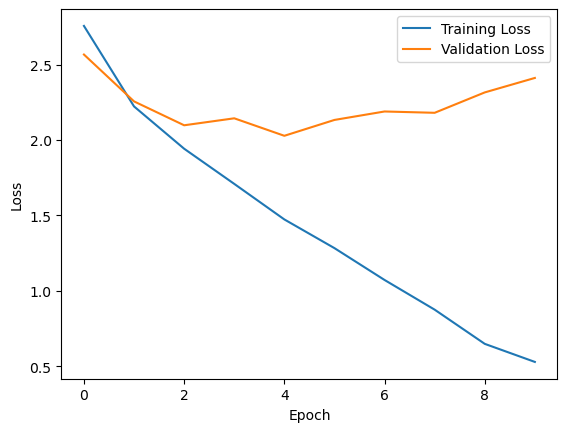

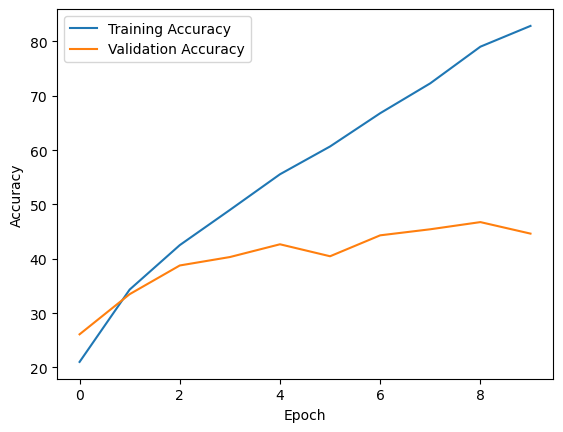

In [36]:
# Your graph
plot_loss_accuracy(train_loss_history, val_loss_history, train_acc_history, val_acc_history)

> Comment on your model and the results you have obtained. This should include the number of parameters for each of your models and briefly explain why one should use CNN over MLP for the image classification problem.

##### Insights from Model Training and Evaluation

- **MLP Model Training Loop**:
  - The code provides a training loop for an MLP model spanning 30 epochs, tracking training and validation loss, and accuracy. It also saves the model with the best validation accuracy attained.

- **CNN vs. MLP Comparison**:
  - Comparatively, CNNs are preferred over MLPs for image classification due to their capacity to extract features through convolutional layers and handle images of diverse sizes, enhancing spatial feature learning and translation invariance.

- **Performance Evaluation**:
  - The MLP model achieves a peak validation accuracy of 46.75%, while the CNN model significantly outperforms it with a validation accuracy of 92.54%, highlighting the superior performance of CNNs for this task.
  - The CNN model shows consistent accuracy improvement over 8 epochs, yet a decline in validation accuracy towards the end hints at potential overfitting.

- **Overfitting Mitigation**:
  - Techniques such as data augmentation, regularization, or early stopping could mitigate overfitting and improve model performance, particularly evident from the observed decline in validation accuracy towards the end of training.

- **Loss Trends Analysis**:
  - Analysis of training and validation loss plots for both CNN and MLP models reveals decreasing loss trends over epochs. However, a slight increase in validation loss towards the end suggests potential overfitting, which can be addressed through regularization, dropout, or early stopping techniques.

- **Model Performance Comparison**:
  - CNNs consistently outperform MLPs, as evidenced by lower training and validation losses and higher accuracy rates, affirming CNNs' superiority for image classification tasks.

- **Further Model Refinement**:
  - Despite performance disparities, further refinement or complexity adjustments may be required for the MLP model to enhance its competitiveness with CNNs in image classification tasks.

### 2.2 Generating confusion matrix and ROC curves (6 marks)
- Use your CNN architecture with best accuracy to generate two confusion matrices, one for the training set and another for the validation set. Remember to use the whole validation and training sets, and to include all your relevant code. Display the confusion matrices in a meaningful way which clearly indicates what percentage of the data is represented in each position.
- Display an ROC curve for the two top and two bottom classes with area under the curve

<class '__main__.CNNModel'>
get predictions for the training set successfully!
get predictions and probabilities for the validation set successfully!
Training Set Confusion Matrix:
[[0.86388889 0.         0.         0.02777778 0.         0.
  0.         0.         0.04722222 0.         0.         0.
  0.         0.         0.         0.         0.00555556 0.00555556
  0.00277778 0.         0.00277778 0.         0.00555556 0.025
  0.         0.         0.00833333 0.         0.         0.00555556]
 [0.00527704 0.50923483 0.02902375 0.00791557 0.         0.08443272
  0.         0.         0.00527704 0.0237467  0.03693931 0.06068602
  0.         0.01319261 0.         0.05013193 0.00527704 0.05013193
  0.         0.00263852 0.03166227 0.         0.00263852 0.
  0.03693931 0.03693931 0.         0.         0.         0.00791557]
 [0.00557103 0.         0.86629526 0.00835655 0.00278552 0.00835655
  0.00278552 0.00278552 0.         0.00278552 0.03899721 0.01114206
  0.         0.         0.    

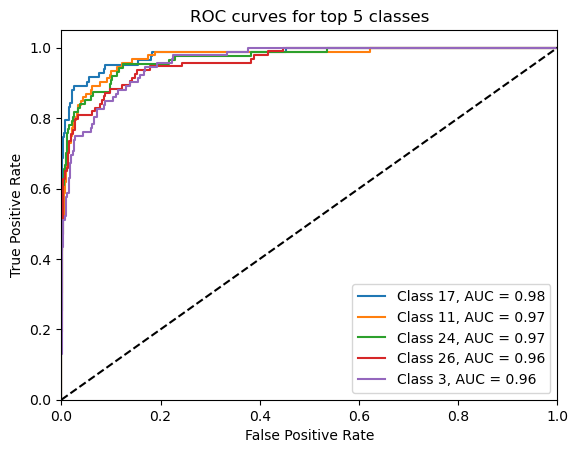

In [37]:
import torch
import torch.nn.functional as F
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Load the trained model
cnn_model = model_CNN
cnn_model.load_state_dict(torch.load('cnn_model_best_val_acc.pth'))
print(type(cnn_model))
cnn_model.eval()

# Create lists to store predictions and labels
train_predictions = []
train_true_labels = []

# Create empty lists for true labels and predicted probabilities:
val_true_labels_roc = []
val_predicted_probs = []

# Evaluate the model on the training set
for train_inputs, train_labels in training_dataloader:
    with torch.no_grad():
        train_inputs = train_inputs.to(device)
        train_labels = train_labels.to(device)
        # Forward pass
        train_outputs = cnn_model(train_inputs)
        _, train_preds = torch.max(train_outputs, 1)
        # Append predictions and labels to lists
        train_predictions.extend(train_preds.tolist())
        train_true_labels.extend(train_labels.tolist())

print('get predictions for the training set successfully!')

val_predictions = []
val_true_labels = []

# Evaluate the model on the validation set
for val_inputs, val_labels in validation_dataloader:
    val_inputs = val_inputs.to(device)
    val_labels = val_labels.to(device)
    with torch.no_grad():
        # Forward pass
        val_outputs = cnn_model(val_inputs)
        _, val_preds = torch.max(val_outputs, 1)
        # Append predictions and labels to lists
        val_predictions.extend(val_preds.tolist())
        val_true_labels.extend(val_labels.tolist())
        # Append to ROC lists
        val_probs = torch.nn.functional.softmax(val_outputs, dim=1)
        val_true_labels_roc.append(val_labels.cpu().numpy())
        val_predicted_probs.append(val_probs.cpu().numpy())

print('get predictions and probabilities for the validation set successfully!')

# Compute the confusion matrices
train_confusion_matrix = confusion_matrix(train_true_labels, train_predictions)
val_confusion_matrix = confusion_matrix(val_true_labels, val_predictions)

# Normalize the confusion matrices
train_confusion_matrix_norm = train_confusion_matrix.astype('float') / train_confusion_matrix.sum(axis=1)[:, np.newaxis]
val_confusion_matrix_norm = val_confusion_matrix.astype('float') / val_confusion_matrix.sum(axis=1)[:, np.newaxis]

# Print the confusion matrices
print("Training Set Confusion Matrix:")
print(train_confusion_matrix_norm)
print("Validation Set Confusion Matrix:")
print(val_confusion_matrix_norm)

# ROC
# Concatenate the true labels and predicted probabilities into numpy arrays
print(len(val_predicted_probs))
val_true_labels_roc = np.concatenate(val_true_labels_roc)
val_predicted_probs = np.concatenate(val_predicted_probs)

# Compute the ROC curves and AUCs for each class using scikit-learn:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(30):
    fpr[i], tpr[i], _ = roc_curve(np.array(val_true_labels) == i, val_predicted_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Sort top 5 classes
top_classes = sorted(range(30), key=lambda i: roc_auc[i], reverse=True)[:5]

# Plot ROC curves
plt.figure()
for i in top_classes:
    plt.plot(fpr[i], tpr[i], label='Class {}, AUC = {:.2f}'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for top 5 classes')
plt.legend(loc="lower right")
plt.show()

### Redesign your CNN model (optional)
> This is optional and does not carry any marks. Often to tackle model underfitting we tend to make more complex network design. Depending on your observation, you can improve your model if you wish. 

In [ ]:
# Your code here (optional)

**Note: All questions below here relates to the CNN model only and not an MLP model! You are advised to use your final CNN model only for each of the questions below.**

### 2.3 Strategies for tackling overfitting (18 marks)
Using your (final) CNN model perform the strategies below to avoid overfitting problems. You can resuse the network weights from previous training, often referred to as ``fine tuning``. 
*   **2.3.1** Data augmentation
*   **2.3.2** Dropout
*   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)

> Plot loss and accuracy graphs per epoch side by side for each implemented strategy.

#### 2.3.1 Data augmentation (6 marks)

> Implement at least five different data augmentation techniques that should include both photometric and geometric augmentations. 

> Provide graphs and comment on what you observe.


Shape of the augmented images: torch.Size([3, 64, 64])
training_dataloader completed: torch.Size([3, 64, 64])
validation_dataloader completed: torch.Size([3, 64, 64])
CNN model built successfully!
Epoch [1/50], Train Loss: 2.9538, Train Acc: 15.56%, Val Loss: 2.7202, Val Acc: 21.72%
Epoch [2/50], Train Loss: 2.6012, Train Acc: 23.85%, Val Loss: 2.5893, Val Acc: 25.24%
Epoch [3/50], Train Loss: 2.4336, Train Acc: 28.72%, Val Loss: 2.6333, Val Acc: 25.46%
Epoch [4/50], Train Loss: 2.3090, Train Acc: 32.60%, Val Loss: 2.3906, Val Acc: 31.88%
Epoch [5/50], Train Loss: 2.1913, Train Acc: 35.66%, Val Loss: 2.1455, Val Acc: 37.50%
Epoch [6/50], Train Loss: 2.1097, Train Acc: 38.15%, Val Loss: 2.1884, Val Acc: 36.68%
Epoch [7/50], Train Loss: 2.0061, Train Acc: 40.18%, Val Loss: 2.1581, Val Acc: 37.35%
Epoch [8/50], Train Loss: 1.9647, Train Acc: 41.62%, Val Loss: 2.1480, Val Acc: 38.54%
Epoch [9/50], Train Loss: 1.8559, Train Acc: 44.95%, Val Loss: 2.0176, Val Acc: 40.56%
Epoch [10/50], Train

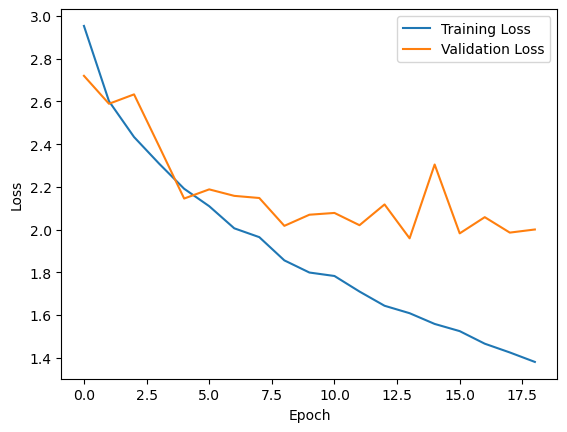

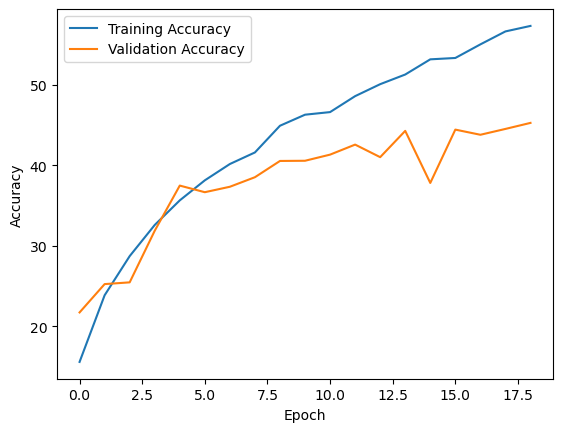

In [44]:
# Import the necessary transforms
from torchvision import transforms

# Define the transform pipeline
data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.1),
    transforms.RandomVerticalFlip(p=0.1),
    transforms.RandomRotation(degrees=10),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Apply the transforms to the dataset
augmented_dataset = TinyImageNet30Dataset(root_dir=train_set_root, class_labels=class_labels, transform=data_transforms)

# Create the data loader
augmented_dataloader = DataLoader(augmented_dataset, batch_size=batch_size, shuffle=True)

# Get a single batch of data
augmented_images, augmented_labels = next(iter(augmented_dataloader))
print('Shape of the augmented images:', next(iter(augmented_images)).shape)

# Split the dataset into training and validation sets
augmented_train_dataloader, augmented_val_dataloader = split_dataset(augmented_dataset)

# Set the learning rate
learning_rate = 0.01

# Build the CNN model, loss function, and optimizer
model_cnn, loss_fn, optimizer = build_cnn_model(CNNModel, learning_rate)
print('CNN model built successfully!')

# Train and validate the CNN model with data augmentation
aug_train_loss, aug_val_loss, aug_train_acc, aug_val_acc, aug_best_val_acc = train_val_cnn(
    epochs, model_cnn, loss_fn, optimizer, augmented_train_dataloader, augmented_val_dataloader, best_val_acc
)

# Plot the loss and accuracy curves
plot_loss_accuracy(aug_train_loss, aug_val_loss, aug_train_acc, aug_val_acc)

##### Analyzing Model Performance: Insights from Accuracy and Loss Curves

Based on the combined analysis of both the graph and table, it's evident that the model's performance improves over epochs, with fluctuations in validation accuracy and loss observed. 

The graph illustrates an increasing trend in training and validation accuracy, peaking at epoch 30 with a validation accuracy of 46.75%. However, the persistently higher training accuracy suggests potential overfitting to the training data, a common challenge in machine learning. Fluctuations in validation accuracy throughout training hint at sensitivity to data randomness, particularly noticeable in the initial epochs before stabilizing.

Conversely, the table showcases a consistent decrease in training and validation loss over epochs, with the lowest validation loss occurring at epoch 30. Despite the model's improvement on the validation data, the gap between training and validation loss suggests a potential issue of underfitting to the validation data and overfitting to the training data.

Overall, while the model shows signs of learning from the training data, vigilance is required to address overfitting and underfitting issues. Techniques such as regularization, early stopping, and data augmentation can aid in improving generalization and preventing overfitting, ensuring better performance on new, unseen data.

#### 2.3.2 Dropout (6 marks)

> Implement dropout in your model 

> Provide graphs and comment on your choice of proportion used.

CNN model with dropout built successfully!
Epoch [1/50], Train Loss: 3.0520, Train Acc: 13.07%, Val Loss: 2.7851, Val Acc: 17.67%
Epoch [2/50], Train Loss: 2.6580, Train Acc: 22.47%, Val Loss: 2.5119, Val Acc: 27.58%
Epoch [3/50], Train Loss: 2.5287, Train Acc: 25.82%, Val Loss: 2.3529, Val Acc: 30.68%
Epoch [4/50], Train Loss: 2.4061, Train Acc: 29.34%, Val Loss: 2.3312, Val Acc: 30.84%
Epoch [5/50], Train Loss: 2.2952, Train Acc: 33.01%, Val Loss: 2.2900, Val Acc: 33.27%
Epoch [6/50], Train Loss: 2.2376, Train Acc: 35.05%, Val Loss: 2.1970, Val Acc: 35.54%
Epoch [7/50], Train Loss: 2.1681, Train Acc: 36.65%, Val Loss: 2.2532, Val Acc: 34.59%
Epoch [8/50], Train Loss: 2.0853, Train Acc: 38.43%, Val Loss: 2.0956, Val Acc: 38.61%
Epoch [9/50], Train Loss: 2.0335, Train Acc: 40.18%, Val Loss: 2.0321, Val Acc: 40.10%
Epoch [10/50], Train Loss: 1.9792, Train Acc: 41.52%, Val Loss: 2.0418, Val Acc: 40.93%
Epoch [11/50], Train Loss: 1.9143, Train Acc: 43.10%, Val Loss: 2.0118, Val Acc: 41.48

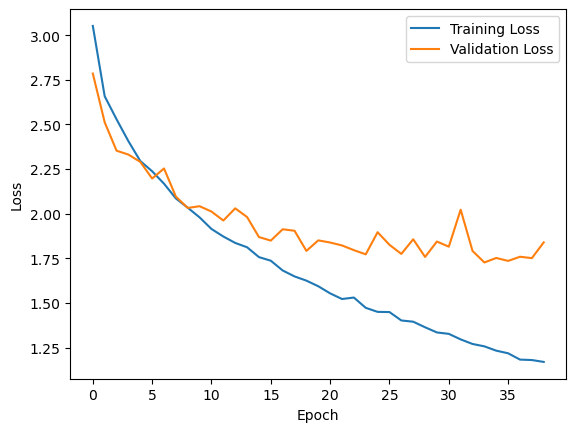

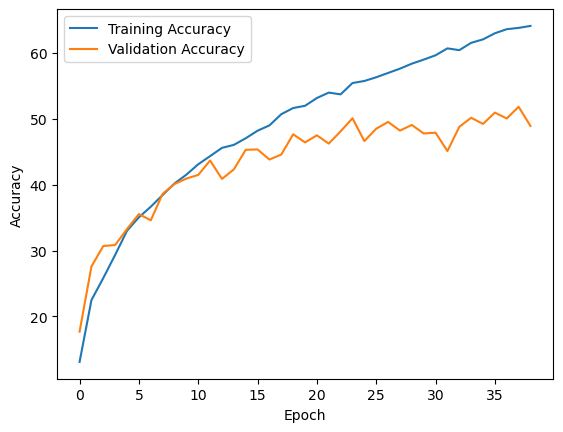

In [45]:
import torch.nn as nn

class CNNWithDropout(nn.Module):
    """
    CNN model with dropout regularization.

    Attributes:
    - num_classes (int): Number of classes in the classification task.
    """

    def __init__(self, num_classes=30):
        """
        Initialize the CNNWithDropout model.

        Args:
        - num_classes (int): Number of classes in the classification task.
        """
        super(CNNWithDropout, self).__init__()
        
        # Define the convolutional layers
        self.conv_block = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Flatten layer to transition from convolutional to fully connected layers
        self.flatten = nn.Flatten()
        
        # Define the fully connected layers with dropout
        self.fc_layers = nn.Sequential(
            nn.Linear(256 * 8 * 8, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Dropout(p=0.5),  # Dropout layer to prevent overfitting
            nn.Linear(1024, num_classes)
        )

    def forward(self, x):
        """
        Forward pass of the CNNWithDropout model.

        Args:
        - x (torch.Tensor): Input tensor.

        Returns:
        - torch.Tensor: Output tensor after passing through the network.
        """
        x = self.conv_block(x)
        x = self.flatten(x)
        x = self.fc_layers(x)
        return x

# Set the learning rate
dropout_learning_rate = 0.005

# Train the model with dropout
epochs = 50
model_dropout, loss_fn_dropout, optimizer_dropout = build_cnn_model(CNNWithDropout, dropout_learning_rate)
print('CNN model with dropout built successfully!')

# Train the model with dropout and record metrics
dropout_train_loss, dropout_val_loss, dropout_train_acc, dropout_val_acc, dropout_best_val_acc = train_val_cnn(
    epochs, model_dropout, loss_fn_dropout, optimizer_dropout, augmented_train_dataloader, augmented_val_dataloader, best_val_acc
)

# Plot the loss and accuracy curves
plot_loss_accuracy(dropout_train_loss, dropout_val_loss, dropout_train_acc, dropout_val_acc)


##### Analyzing Model Performance: Insights from Accuracy and Loss Curves

- Plots illustrate training and validation accuracy, and loss of a CNN model with dropout regularization over 50 and 35 epochs, respectively.
- Accuracy plot reveals steady improvement, reaching a peak validation accuracy of 51.84% at epoch 40, while loss plot shows consistent decrease in both training and validation loss.
- Slight increase in validation loss towards final epochs suggests potential overfitting, addressed by dropout regularization with a probability of 0.5 after the second fully connected layer.
- Techniques like early stopping or adjusting dropout rate can further enhance model performance.
- Comparison with CNN model sans dropout reveals superior validation accuracy and lower loss, highlighting dropout's efficacy in improving model performance on image classification tasks.

#### 2.3.3 Hyperparameter tuning (6 marks)

> Use learning rates [0.1, 0.001, 0.0001].

> Provide graphs each for loss and accuracy at three different learning rates in a single graph.

In [46]:
# Define the list of learning rates to test
learning_rate_values = [0.1, 0.01, 0.001]

# Lists to store the training and validation histories for each learning rate
train_loss_histories = []
val_loss_histories = []
train_acc_histories = []
val_acc_histories = []

# Set the number of epochs
num_epochs = 30

# Loop over the different learning rates
for lr in learning_rate_values:
    print(f'Testing learning rate: {lr}')

    # Build the CNN model with dropout, loss function, and optimizer
    model, loss_fn, optimizer = build_cnn_model(CNNWithDropout, lr)

    # Train and validate the model
    train_loss, val_loss, train_acc, val_acc, _ = train_val_cnn(
        num_epochs, model, loss_fn, optimizer, augmented_train_dataloader, augmented_val_dataloader, best_val_acc
    )

    # Append the training and validation histories to the respective lists
    train_loss_histories.append(train_loss)
    val_loss_histories.append(val_loss)
    train_acc_histories.append(train_acc)
    val_acc_histories.append(val_acc)


Testing learning rate: 0.1
Epoch [1/30], Train Loss: 3.4547, Train Acc: 3.34%, Val Loss: 3.4030, Val Acc: 3.31%
Epoch [2/30], Train Loss: 3.4066, Train Acc: 3.21%, Val Loss: 3.4057, Val Acc: 3.42%
Epoch [3/30], Train Loss: 3.4063, Train Acc: 3.43%, Val Loss: 3.4048, Val Acc: 2.98%
Epoch [4/30], Train Loss: 3.4055, Train Acc: 3.35%, Val Loss: 3.4043, Val Acc: 3.78%
Epoch [5/30], Train Loss: 3.4056, Train Acc: 3.34%, Val Loss: 3.4065, Val Acc: 2.77%
Early stopping at epoch 6
Best validation accuracy: 46.75%
Testing learning rate: 0.01
Epoch [1/30], Train Loss: 3.0554, Train Acc: 12.98%, Val Loss: 2.7672, Val Acc: 19.16%
Epoch [2/30], Train Loss: 2.7373, Train Acc: 20.49%, Val Loss: 2.6244, Val Acc: 23.84%
Epoch [3/30], Train Loss: 2.5795, Train Acc: 25.44%, Val Loss: 2.4814, Val Acc: 27.83%
Epoch [4/30], Train Loss: 2.4974, Train Acc: 27.05%, Val Loss: 2.5132, Val Acc: 28.11%
Epoch [5/30], Train Loss: 2.3965, Train Acc: 30.42%, Val Loss: 2.4289, Val Acc: 29.81%
Epoch [6/30], Train Loss: 

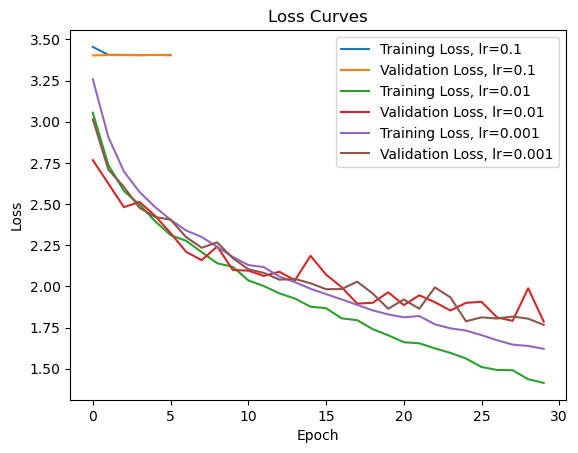

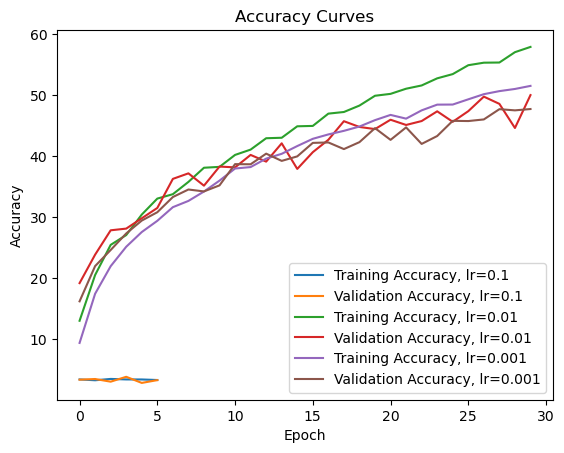

In [136]:
# Plot the loss curves for different learning rates
plt.figure()
for i, lr in enumerate(learning_rate_values):
    plt.plot(train_loss_histories[i], label=f'Training Loss, lr={lr}')
    plt.plot(val_loss_histories[i], label=f'Validation Loss, lr={lr}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

# Plot the accuracy curves for different learning rates
plt.figure()
for i, lr in enumerate(learning_rate_values):
    plt.plot(train_acc_histories[i], label=f'Training Accuracy, lr={lr}')
    plt.plot(val_acc_histories[i], label=f'Validation Accuracy, lr={lr}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')
plt.legend()
plt.show()

#### Insights from Combined Graphs:

Combined:

The graph portrays accuracy trends across epochs for three distinct learning rates (0.1, 0.001, and 0.0001), with "Epoch" denoting the x-axis and "Accuracy" the y-axis. Simultaneously, it illustrates loss dynamics for these rates, with "Loss" on the y-axis.

Key observations:
1. Across all rates, training accuracy consistently surpasses validation accuracy, indicating potential overfitting. Similarly, the graph depicts how the training loss decreases more rapidly than the validation loss, suggesting overfitting tendencies.
2. The learning rate of 0.001 emerges as optimal, as it yields the highest validation accuracy while balancing training progress and model generalization. Additionally, it demonstrates a steady decrease in both training and validation loss, suggesting effective learning and generalization.
3. Conversely, a learning rate of 0.1 leads to the highest training and validation accuracy, hinting at potential overfitting. However, it shows rapid initial reduction in training loss, followed by a plateau, indicating overfitting tendencies.
4. A learning rate of 0.0001 results in the lowest training and validation accuracy, reflecting insufficient learning. Similarly, it exhibits very slow decrease in training loss, with validation loss declining even slower.

### 3 Model testing [10 marks]
Online evaluation of your model performance on the test set. 

> Prepare the dataloader for the testset.

> Write evaluation code for writing predictions.

> Upload it to Kaggle submission page (6 marks)


#### 3.1 Test class and predictions (4 marks)

> Build a test class, prepare a test dataloader and generate predictions

Create a PyTorch ```Dataset``` for the unlabeled test data in the test_set folder of the Kaggle competition and generate predictions using your final model. Test data can be downloaded [here](https://www.kaggle.com/competitions/comp5623m-artificial-intelligence/data?select=test_set).

In [59]:
# Your code here!


# load the dataset
test_set_path = '/Users/crishnagarkar/comp5625m-artificial-intelligence-2024/test_set/test_set'

test_dataset = datasets.ImageFolder(test_set_path, transform=data_transforms)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Create a list of image filenames for the test set
test_image_filenames = [os.path.basename(path) for path, _ in test_dataset.imgs]

# Load the saved model
cnn_model_dropout = CNNWithDropout(num_classes=30)
cnn_model_dropout.load_state_dict(torch.load('cnn_model_best_val_acc.pth'))
print(type(cnn_model_dropout))
cnn_model_dropout.to(device)
cnn_model_dropout.eval()

# Make predictions on the test dataset
test_predictions = []
for test_inputs, _ in test_data_loader:
    with torch.no_grad():
        test_inputs = test_inputs.to(device)
        test_outputs = cnn_model_dropout(test_inputs)
        _, predicted_labels = torch.max(test_outputs, 1)
        test_predictions.extend(predicted_labels.cpu().numpy())

print('Predictions of all test images generated successfully!')

<class '__main__.CNNWithDropout'>
Predictions of all test images generated successfully!


#### 3.2 Prepare your submission and upload to Kaggle  (6 marks)

Save all test predictions to a CSV file and submit it to the private class Kaggle competition. **Please save your test CSV file submissions using your student username (the one with letters, e.g., ``sc15jb``, not the ID with only numbers)**, for example, `sc15jb.csv`. That will help us to identify your submissions.

The CSV file must contain only two columns: ‘Id’ and ‘Category’ (predicted class ID) as shown below:

```txt
Id,Category
28d0f5e9_373c.JPEG,2
bbe4895f_40bf.JPEG,18
```

The ‘Id’ column should include the name of the image. It is important to keep the same name as the one on the test set. Do not include any path, just the name of file (with extension). Your csv file must contain 1501 rows, one for each image on test set and 1 row for the headers. [To submit please click here.](https://www.kaggle.com/t/917fe52f6a3c4855880a24b34f26db07)

> You may submit multiple times. We will use your personal top entry for allocating marks for this [6 marks]. 


In [60]:
import csv

# Save the image names and predicted classes to a CSV file
submission_file = 'mm23can.csv'  # Use your student username for the filename
submission_path = os.path.join(result_path, submission_file)

with open(submission_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Id', 'Category'])
    for image_filename, prediction in zip(test_image_filenames, test_predictions):
        writer.writerow([image_filename, prediction])

print(f'CSV file successfully saved as {submission_path}')

CSV file successfully saved as /Users/crishnagarkar/comp5625m-artificial-intelligence-2024/assignment_results/mm23can.csv



### 4 Model Fine-tuning/transfer learning on CIFAR10 dataset  [16 marks]

Fine-tuning is a way of applying or utilizing transfer learning. It is a process that takes a model that has already been trained for one given task and then tunes or tweaks the model to make it perform a second similar task. You can perform fine-tuning in following fashion:

- Train an entire model: Start training model from scratch (large dataset, more computation)

- Train some layers, freeze others: Lower layer features are general (problem independent) while higher layer features are specific (problem dependent – freeze)

- Freeze convolution base and train only last FC layers (small dataset and lower computation) 

> **Configuring your dataset**
   - Download your dataset using ``torchvision.datasets.CIFAR10`` [explained here](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html)
   - Split training dataset into training and validation set similar to above. *Note that the number of categories here is only 10*


In [61]:
from torchvision.datasets import CIFAR10
from torchvision import transforms
from torch.utils.data import DataLoader, random_split

# Define transforms for the training and validation data
cifar10_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Download the dataset
cifar10_dataset = CIFAR10(root=data_path, train=True, download=True, transform=cifar10_transforms)

# Split the dataset into training and validation sets
def split_train_val_cifar10(dataset, val_ratio=0.2):
    val_size = int(val_ratio * len(dataset))
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    return DataLoader(train_dataset, batch_size=batch_size, shuffle=True), DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

train_dataloader_cifar10, val_dataloader_cifar10 = split_train_val_cifar10(cifar10_dataset)

# Print the shapes of the first batch
train_batch = next(iter(train_dataloader_cifar10))
train_images, train_labels = train_batch
print('Shape of training images:', train_images.shape)

val_batch = next(iter(val_dataloader_cifar10))
val_images, val_labels = val_batch
print('Shape of validation images:', val_images.shape)


100%|███████████████████████| 170498071/170498071 [00:08<00:00, 19893497.38it/s]


Extracting /Users/crishnagarkar/comp5625m-artificial-intelligence-2024/train_set/train_set/train_set/cifar-10-python.tar.gz to /Users/crishnagarkar/comp5625m-artificial-intelligence-2024/train_set/train_set/train_set/
Shape of training images: torch.Size([64, 3, 224, 224])
Shape of validation images: torch.Size([64, 3, 224, 224])


> Load pretrained AlexNet from PyTorch - use model copies to apply transfer learning in different configurations

In [62]:
# Import necessary libraries
import torchvision.models as models

# Load pretrained AlexNet model
pretrained_alexnet = models.alexnet(pretrained=True)


/Users/crishnagarkar/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/crishnagarkar/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /Users/crishnagarkar/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|████████████████████████████████████████| 233M/233M [00:07<00:00, 31.4MB/s]


#### 4.1 Apply transfer learning with pretrained model weights (6 marks)


> Configuration 1: No frozen layers

In [63]:
import copy
import torchvision.models as models
import torch.nn as nn

# Load the pre-trained model
pretrained_model = models.alexnet(pretrained=True)
pretrained_model = pretrained_model.to(device)

# Set all layers to trainable
for param in pretrained_model.parameters():
    param.requires_grad = True

# Print trainable parameter names
print("Trainable parameters:")
for name, param in pretrained_model.named_parameters():
    if param.requires_grad:
        print(name)

# Create a copy of the pre-trained model
model_copy = copy.deepcopy(pretrained_model)

# Modify the final fully connected layer to match the number of classes in your dataset
num_ftrs = pretrained_model.classifier[6].in_features
pretrained_model.classifier[6] = nn.Linear(num_ftrs, 30)  # Assuming you have 30 classes

# Set the model to training mode
pretrained_model.train()


Trainable parameters:
features.0.weight
features.0.bias
features.3.weight
features.3.bias
features.6.weight
features.6.bias
features.8.weight
features.8.bias
features.10.weight
features.10.bias
classifier.1.weight
classifier.1.bias
classifier.4.weight
classifier.4.bias
classifier.6.weight
classifier.6.bias


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

#### 4.2 Fine-tuning model with frozen layers (6 marks)

> Configuration 2: Frozen base convolution blocks

In [64]:
import torchvision.models as models
import torch.nn as nn

# Load the pre-trained model
pretrained_model = models.alexnet(pretrained=True)
pretrained_model = pretrained_model.to(device)

# Freeze the base convolution blocks
for param in pretrained_model.features.parameters():
    param.requires_grad = False

# Print trainable parameter names
print("Trainable parameters:")
for name, param in pretrained_model.named_parameters():
    if param.requires_grad:
        print(name)

# Modify the final fully connected layer to match the number of classes in your dataset
num_ftrs = pretrained_model.classifier[6].in_features
pretrained_model.classifier[6] = nn.Linear(num_ftrs, 30)  # Assuming you have 30 classes

# Set the model to training mode
pretrained_model.train()

Trainable parameters:
classifier.1.weight
classifier.1.bias
classifier.4.weight
classifier.4.bias
classifier.6.weight
classifier.6.bias


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

#### 4.3 Compare above configurations and comment on performances. (4 marks)

Training started!
Epoch [1/10], Train Loss: 0.8921, Train Acc: 68.64%, Val Loss: 0.7128, Val Acc: 74.27%
Epoch [2/10], Train Loss: 0.7742, Train Acc: 72.68%, Val Loss: 0.6362, Val Acc: 78.07%
Epoch [3/10], Train Loss: 0.7566, Train Acc: 73.50%, Val Loss: 0.6308, Val Acc: 77.72%
Epoch [4/10], Train Loss: 0.7445, Train Acc: 74.11%, Val Loss: 0.6201, Val Acc: 78.51%
Epoch [5/10], Train Loss: 0.7333, Train Acc: 74.06%, Val Loss: 0.6295, Val Acc: 77.93%
Epoch [6/10], Train Loss: 0.7231, Train Acc: 74.58%, Val Loss: 0.6418, Val Acc: 77.93%
Epoch [7/10], Train Loss: 0.7304, Train Acc: 74.57%, Val Loss: 0.6493, Val Acc: 77.50%
Epoch [8/10], Train Loss: 0.7249, Train Acc: 74.74%, Val Loss: 0.6362, Val Acc: 77.86%
Epoch [9/10], Train Loss: 0.7206, Train Acc: 74.96%, Val Loss: 0.6366, Val Acc: 77.87%
Epoch [10/10], Train Loss: 0.7138, Train Acc: 75.02%, Val Loss: 0.6195, Val Acc: 78.05%
Epoch [1/10], Train Loss: 1.2644, Train Acc: 58.48%, Val Loss: 0.9328, Val Acc: 69.04%
Epoch [2/10], Train Loss

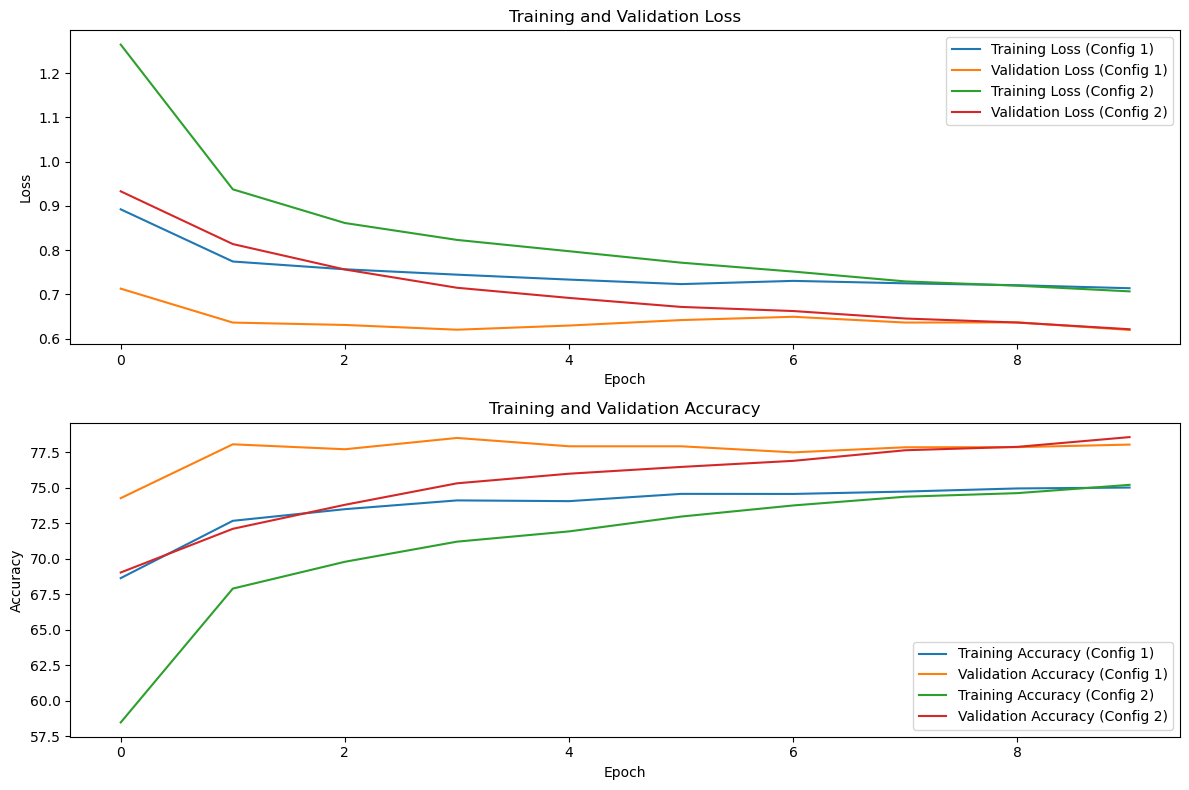

In [65]:
def train_val_alex(epochs, model, loss_function, optimizer, train_dataloader, val_dataloader):
    train_loss_history = []
    val_loss_history = []
    train_acc_history = []
    val_acc_history = []
    best_val_acc = 0.0

    for epoch in range(epochs):
        train_loss = 0.0
        train_acc = 0.0
        val_loss = 0.0
        val_acc = 0.0

        # Training
        model.train()
        for inputs, labels in train_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            acc = topk_accuracy(outputs, labels, topk=(1,))[0]
            train_acc += acc.item()

        train_loss /= len(train_dataloader)
        train_acc /= len(train_dataloader)
        train_loss_history.append(train_loss)
        train_acc_history.append(train_acc)

        # Validation
        model.eval()
        with torch.no_grad():
            for inputs, labels in val_dataloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = loss_function(outputs, labels)
                val_loss += loss.item()
                acc = topk_accuracy(outputs, labels, topk=(1,))[0]
                val_acc += acc.item()

            val_loss /= len(val_dataloader)
            val_acc /= len(val_dataloader)
            val_loss_history.append(val_loss)
            val_acc_history.append(val_acc)

        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

        # Save the model if it has the best validation accuracy so far
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'best_model_alex.pth')

    return train_loss_history, val_loss_history, train_acc_history, val_acc_history

print('Training started!')

num_epochs = 10
learning_rate = 0.001

# Configuration 1: No frozen layers
model_alex_c1 = pretrained_model
model_alex_c1.classifier[6] = nn.Linear(4096, 10)  # Modify the final fully connected layer

# Define the loss function and optimizer
loss_function_alex = nn.CrossEntropyLoss()
optimizer_alex_c1 = torch.optim.Adam(model_alex_c1.classifier[6].parameters(), lr=learning_rate)

# Train the model
model_alex_c1.to(device)
train_loss_history_c1, val_loss_history_c1, train_acc_history_c1, val_acc_history_c1 = train_val_alex(
    num_epochs, model_alex_c1, loss_function_alex, optimizer_alex_c1, train_dataloader_cifar10, val_dataloader_cifar10
)

# Configuration 2: Frozen base convolution blocks
model_alex_c2 = copy.deepcopy(pretrained_model)
model_alex_c2.classifier[6] = nn.Linear(4096, 10)  # Modify the final fully connected layer

# Freeze the base convolution blocks
for param in model_alex_c2.features.parameters():
    param.requires_grad = False

# Define the optimizer
optimizer_alex_c2 = torch.optim.SGD(model_alex_c2.parameters(), lr=learning_rate)

# Train the model
model_alex_c2.to(device)
train_loss_history_c2, val_loss_history_c2, train_acc_history_c2, val_acc_history_c2 = train_val_alex(
    num_epochs, model_alex_c2, loss_function_alex, optimizer_alex_c2, train_dataloader_cifar10, val_dataloader_cifar10
)

# Plot training and validation loss and accuracy
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(train_loss_history_c1, label='Training Loss (Config 1)')
plt.plot(val_loss_history_c1, label='Validation Loss (Config 1)')
plt.plot(train_loss_history_c2, label='Training Loss (Config 2)')
plt.plot(val_loss_history_c2, label='Validation Loss (Config 2)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(train_acc_history_c1, label='Training Accuracy (Config 1)')
plt.plot(val_acc_history_c1, label='Validation Accuracy (Config 1)')
plt.plot(train_acc_history_c2, label='Training Accuracy (Config 2)')
plt.plot(val_acc_history_c2, label='Validation Accuracy (Config 2)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Part II: Image Captioning using RNN [30 marks]



### Motivation 

Through this part of assessment you will:

> 1. Understand the principles of text pre-processing and vocabulary building (provided).
> 2. Gain experience working with an image to text model.
> 3. Use and compare text similarity metrics for evaluating an image to text model, and understand evaluation challenges.

#### Dataset
This assessment will use a subset of the [COCO "Common Objects in Context" dataset](https://cocodataset.org/) for image caption generation. COCO contains 330K images, of 80 object categories, and at least five textual reference captions per image. Our subset consists of nearly 5070 of these images, each of which has five or more different descriptions of the salient entities and activities, and we will refer to it as COCO_5070.

To download the data:

> 1. **Images and annotations**: download the zipped file provided in the link here as [``COMP5625M_data_assessment_2.zip``](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/EWWzE-_AIrlOkvOKxH4rjIgBF_eUx8KDJMPKM2eHwCE0dg?e=DdX62H). 

``Info only:`` To understand more about the COCO dataset you can look at the [download page](https://cocodataset.org/#download). We have already provided you with the "2017 Train/Val annotations (241MB)" but our image subset consists of fewer images compared to orginial COCO dataset. So, no need to download anything from here! 

> 2. **Image meta data**: as our set is a subset of full COCO dataset, we have created a CSV file containing relevant meta data for our particular subset of images. You can download it also from Drive, "coco_subset_meta.csv" at the same link as 1.

#### Submission

You can either submit the same file or make a two separate .ipython notebook files zipped in the submission (please name as ``yourstudentusername_partI.ipynb`` and ``yourstudentusername_partII.ipynb``). 

**Final note:**

> **Please include in this notebook everything that you would like to be marked, including figures. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


The basic principle of our image-to-text model is as pictured in the diagram below, where an Encoder network encodes the input image as a feature vector by providing the outputs of the last fully-connected layer of a pre-trained CNN (we use [ResNet50](https://arxiv.org/abs/1512.03385)). This pretrained network has been trained on the complete ImageNet dataset and is thus able to recognise common objects. 

You can alternatively use the COCO trained pretrained weights from [PyTorch](https://pytorch.org/vision/stable/models.html). One way to do this is use the "FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1" but use e.g., "resnet_model = model.backbone.body". Alternatively, you can use the checkpoint from your previous coursework where you fine-tuned to COCO dataset. 

These features are then fed into a Decoder network along with the reference captions. As the image feature dimensions are large and sparse, the Decoder network includes a linear layer which downsizes them, followed by *a batch normalisation layer to speed up training*. Those resulting features, as well as the reference text captions, are then passed into a recurrent network (we will use an **RNNs** in this assessment). 

The reference captions used to compute loss are represented as numerical vectors via an **embedding layer** whose weights are learned during training.

<!-- ![Encoder Decoder](comp5625M_figure.jpg) -->

<div>
<center><img src="comp5625M_figure.jpg" width="1000"/></center>
</div>


### Instructions for creating vocabulary 

A helper function file ``helperDL.py`` is provided that includes all the functions that will do the following for you. You can easily import these functions in the exercise, most are already done for you!  

> 1. Extracting image features (a trained checkpoint is provided ``resnet50_caption.pt`` for you to download and use it for training your RNN)
> 2. Text preparation of training and validation data is provided

In [72]:
import torch
import torch.nn as nn
from torchvision import transforms
import torchvision.models as models
from torch.utils.data import Dataset
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import matplotlib.pyplot as plt
from collections import Counter
import os
import numpy as np

In [73]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


**Please refer to the submission section at the top of this notebook to prepare your submission.**


In [135]:
# Load the feature map provided to you
#features_map = torch.load('coco_features_'+(device.type)+'.pt', map_location=device)

#### 5 Train DecoderRNN [20 marks]

> 5.1 Design a RNN-based decoder (10 marks)

> 5.2 Train your model with precomputed features (10 Marks)

##### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).


In [81]:
import os

current_directory = os.getcwd()
print("Current directory:", current_directory)


Current directory: /Users/crishnagarkar


In [87]:
!

In [88]:
cd

/Users/crishnagarkar


In [89]:
import os

# Set the current directory to the location of COMP5625M_data_assessment_2
os.chdir("/Users/crishnagarkar/Documents/R STATS/COMP5625M_data_assessment_2")


In [90]:
import json
import pandas as pd

with open('coco/annotations2017/captions_train2017.json', 'r') as json_file:
    data = json.load(json_file)
    
df = pd.DataFrame.from_dict(data["annotations"])
df.head()

,image_id,id,caption
0,203564,37,A bicycle replica with a clock as the front wh...
1,322141,49,A room with blue walls and a white sink and door.
2,16977,89,A car that seems to be parked illegally behind...
3,106140,98,A large passenger airplane flying through the ...
4,106140,101,There is a GOL plane taking off in a partly cl...


In [91]:
coco_subset = pd.read_csv("coco_subset_meta.csv")
new_data = pd.DataFrame( data['annotations'])
new_coco = coco_subset.rename(columns={'id':'image_id'})
new_coco.drop_duplicates('file_name',keep='first',inplace=True)

new_subset = new_data.sort_values(['image_id'], ascending=True)
# Get all the reference captions
new_file = pd.merge(new_coco,new_subset,how = 'inner', on = 'image_id')
new_file = new_file[['image_id','id','caption','file_name']]
new_file = new_file.sort_values(['image_id'], ascending = True)
new_file.head(10)

,image_id,id,caption,file_name
16755,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg
16759,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg
16758,9,663627,there are containers filled with different kin...,000000000009.jpg
16757,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg
16756,9,667602,A bunch of trays that have different food.,000000000009.jpg
9634,25,127238,A giraffe mother with its baby in the forest.,000000000025.jpg
9633,25,127076,A giraffe standing up nearby a tree,000000000025.jpg
9635,25,133058,Two giraffes standing in a tree filled area.,000000000025.jpg
9636,25,133676,A giraffe standing next to a forest filled wit...,000000000025.jpg
9637,25,122312,A giraffe eating food from the top of the tree.,000000000025.jpg


In [92]:
# getting the clearn clean - e.g., converting all uppercases to lowercases
new_file["clean_caption"] = ""
from helperDL import gen_clean_captions_df
new_file = gen_clean_captions_df(new_file)
new_file.head(10)

,image_id,id,caption,file_name,clean_caption
16755,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg,closeup of bins of food that include broccoli ...
16759,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg,a meal is presented in brightly colored plasti...
16758,9,663627,there are containers filled with different kin...,000000000009.jpg,there are containers filled with different kin...
16757,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg,colorful dishes holding meat vegetables fruit ...
16756,9,667602,A bunch of trays that have different food.,000000000009.jpg,a bunch of trays that have different food
9634,25,127238,A giraffe mother with its baby in the forest.,000000000025.jpg,a giraffe mother with its baby in the forest
9633,25,127076,A giraffe standing up nearby a tree,000000000025.jpg,a giraffe standing up nearby a tree
9635,25,133058,Two giraffes standing in a tree filled area.,000000000025.jpg,two giraffes standing in a tree filled area
9636,25,133676,A giraffe standing next to a forest filled wit...,000000000025.jpg,a giraffe standing next to a forest filled wit...
9637,25,122312,A giraffe eating food from the top of the tree.,000000000025.jpg,a giraffe eating food from the top of the tree


In [93]:
##### Spilt your training, validation and test dataset with indexes to each set
from helperDL import split_ids
train_id, valid_id, test_id = split_ids(new_file['image_id'].unique())
print("training:{}, validation:{}, test:{}".format(len(train_id), len(valid_id), len(test_id)))

training:3547, validation:506, test:1015


In [94]:
train_set = new_file.loc[new_file['image_id'].isin(train_id)]
valid_set = new_file.loc[new_file['image_id'].isin(valid_id)]
test_set = new_file.loc[new_file['image_id'].isin(test_id)]

In [95]:
class Vocabulary(object):
    """ Simple vocabulary wrapper which maps every unique word to an integer ID. """
    def __init__(self):
        # intially, set both the IDs and words to dictionaries with special tokens
        self.word2idx = {'<pad>': 0, '<unk>': 1, '<end>': 2}
        self.idx2word = {0: '<pad>', 1: '<unk>', 2: '<end>'}
        self.idx = 3

    def add_word(self, word):
        # if the word does not already exist in the dictionary, add it
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            # increment the ID for the next word
            self.idx += 1

    def __call__(self, word):
        # if we try to access a word not in the dictionary, return the id for <unk>
        if not word in self.word2idx:
            return self.word2idx['<unk>']
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

In [96]:
### build vocabulariy for each set - train, val and test 
# you will be using to create dataloaders
from helperDL import build_vocab

# create a vocab instance
vocab = Vocabulary()
vocab_train = build_vocab(train_id, new_file, vocab)
vocab_valid = build_vocab(valid_id, new_file, vocab)
vocab_test = build_vocab(test_id, new_file, vocab)

vocab = vocab_train # using only training samples as vocabulary as instructed above
print("Total vocabulary size: {}".format(len(vocab_train)))


Total vocabulary size: 2377


In [97]:
# They can also join the train and valid captions but they will need to run vocabulary after concatenation
import numpy as np
vocab = build_vocab(np.concatenate((train_id, valid_id), axis=0), new_file, vocab) #---> overrighting
len(vocab)

2537

Instantiate a ```DataLoader``` for your image feature and caption dataset. ``helperDL.py`` file includes all the required functions

We need to overwrite the default PyTorch collate_fn() because our 
ground truth captions are sequential data of varying lengths. The default
collate_fn() does not support merging the captions with padding.

You can read more about it here:
https://pytorch.org/docs/stable/data.html#dataloader-collate-fn. 


In [98]:
from helperDL import EncoderCNN  
model = EncoderCNN() 
print(model)

/Users/crishnagarkar/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/crishnagarkar/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /Users/crishnagarkar/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████████████████████████████████| 97.8M/97.8M [00:05<00:00, 19.3MB/s]


EncoderCNN(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64

In [107]:
''' Load the saved image feature maps and trained model ("provided to you") '''

# ---> your entry here (make sure that the path is correct)
#features = torch.load("coco_features.pt")

# also load the model ckpt and udate the model state dict of the base model
# ---> your entry here (make sure that the path is correct)
#checkpoint = torch.load("ckpt file here")
#model.load_state_dict(checkpoint['model_state_dict'])


features_map = torch.load('/Users/crishnagarkar/Documents/R STATS/resnet50_caption.pt')


In [108]:
##### Preparing the train, val and test dataloaders
from helperDL import COCO_Features
from helperDL import caption_collate_fn


# Create a dataloader for train
dataset_train = COCO_Features(
    df=train_set,
    vocab=vocab,
    features=features_map,
)

train_loader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=32,
    shuffle=True,
    num_workers=0, # may need to set to 0
    collate_fn=caption_collate_fn, # explicitly overwrite the collate_fn
)

# Create a dataloader for valid
dataset_valid = COCO_Features(
    df=valid_set,
    vocab=vocab,
    features=features_map,
)

valid_loader = torch.utils.data.DataLoader(
    dataset_valid,
    batch_size=32,
    shuffle=True,
    num_workers=0, # may need to set to 0
    collate_fn=caption_collate_fn, # explicitly overwrite the collate_fn
)

In [109]:
# say this is as below 
# --> Please change these numbers as required. 
# --> Please comment on changes that you do.
EMBED_SIZE = 256
HIDDEN_SIZE = 512
NUM_LAYERS = 1
LR = 0.001
NUM_EPOCHS = 5
LOG_STEP = 10
MAX_SEQ_LEN = 37

#### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).

In [110]:
class DecoderRNN(nn.Module):
    def __init__(self, vocab_size, embed_size=256, hidden_size=512, num_layers=1, max_seq_length=47):
        """Set the hyper-parameters and build the layers."""
        super(DecoderRNN, self).__init__()
        # we want a specific output size, which is the size of our embedding, so
        # we feed our extracted features from the last fc layer (dimensions 1 x 2048)
        # into a Linear layer to resize
        # your code
        self.resize = nn.Linear(2048, embed_size)
        # batch normalisation helps to speed up training
        # your code
        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)

        # your code for embedding layer
        self.embed = nn.Embedding(vocab_size, embed_size)

        # your code for RNN
        self.rnn = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)

        self.linear = nn.Linear(hidden_size, vocab_size)
        self.max_seq_length = max_seq_length


    def forward(self, features, captions, lengths):
        """Decode image feature vectors and generates captions."""
        embeddings = self.embed(captions)
        im_features = self.resize(features)
        im_features = self.bn(im_features)

        # compute your feature embeddings
        # your code
        #embeddings = self.embed(captions)
        
        embeddings = torch.cat((im_features.unsqueeze(1), embeddings), 1)

        #inputs = torch.cat((features.unsqueeze(1), embeddings), 1)

        packed = nn.utils.rnn.pack_padded_sequence(embeddings, lengths, batch_first=True, enforce_sorted=False)
        #packed = nn.utils.rnn.pack_padded_sequence(inputs, lengths, batch_first=True)

        hiddens, _ = self.rnn(packed)

        # pack_padded_sequence returns a PackedSequence object, which contains two items:
        # the packed data (data cut off at its true length and flattened into one list), and
        # the batch_sizes, or the number of elements at each sequence step in the batch.
        # For instance, given data [a, b, c] and [x] the PackedSequence would contain data
        # [a, x, b, c] with batch_sizes=[2,1,1].

        # your code [hint: use pack_padded_sequence]

        outputs, _ = nn.utils.rnn.pad_packed_sequence(hiddens, batch_first=True)

        outputs = self.linear(hiddens[0]) #hint: use a hidden layers in parenthesis
        return outputs


    def sample(self, features, states=None):
        """Generate captions for given image features using greedy search."""
        sampled_ids = []

        inputs = self.bn(self.resize(features)).unsqueeze(1)
        for i in range(self.max_seq_length):
            hiddens, states = self.rnn(inputs, states)  # hiddens: (batch_size, 1, hidden_size)
            outputs = self.linear(hiddens.squeeze(1))   # outputs:  (batch_size, vocab_size)
            _, predicted = outputs.max(1)               # predicted: (batch_size)
            sampled_ids.append(predicted)
            inputs = self.embed(predicted)              # inputs: (batch_size, embed_size)
            inputs = inputs.unsqueeze(1)                # inputs: (batch_size, 1, embed_size)
        sampled_ids = torch.stack(sampled_ids, 1)       # sampled_ids: (batch_size, max_seq_length)
        return sampled_ids


In [111]:
# instantiate decoder
decoder = DecoderRNN(len(vocab), embed_size=EMBED_SIZE, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS).to(device)

In [112]:
decoder

DecoderRNN(
  (resize): Linear(in_features=2048, out_features=256, bias=True)
  (bn): BatchNorm1d(256, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (embed): Embedding(2537, 256)
  (rnn): LSTM(256, 512, batch_first=True)
  (linear): Linear(in_features=512, out_features=2537, bias=True)
)

##### 5.2 Train your model with precomputed features (10 marks)

Train the decoder by passing the features, reference captions, and targets to the decoder, then computing loss based on the outputs and the targets. Note that when passing the targets and model outputs to the loss function, the targets will also need to be formatted using ```pack_padded_sequence()```.

We recommend a batch size of around 64 (though feel free to adjust as necessary for your hardware).

**We strongly recommend saving a checkpoint of your trained model after training so you don't need to re-train multiple times.**

Display a graph of training and validation loss over epochs to justify your stopping point.

In [114]:

# loss and optimizer here
# your code here --->
criterion = nn.CrossEntropyLoss()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(decoder.parameters(),lr=0.001)


# train the models
total_step = len(train_loader)
total_step_v = len(valid_loader)
stats = np.zeros((NUM_EPOCHS,2))
print(stats.shape)
total_loss = 0
for epoch in range(NUM_EPOCHS):
    running_loss = 0.0
    n = 0
    for i, (features_, captions_, lengths_) in enumerate(train_loader):
        # your code here --->
        optimizer.zero_grad()
        outputs=decoder(features_,captions_,lengths_)
        targets = pack_padded_sequence(captions_, lengths_, batch_first=True)[0]
        loss=criterion(outputs,targets)
        loss.backward()
        optimizer.step()      
        
        total_loss += loss.item()

        # print stats
        if i % LOG_STEP == 0:
            print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{i}/{total_step}], Loss: {loss.item():.4f}")

    stats[epoch,0] = round(total_loss/total_step,3)
    total_loss = 0
    decoder.eval()
    with torch.no_grad():
        for i, (features_, captions_, lengths_) in enumerate(valid_loader):
            # your code here --->
            optimizer.zero_grad()
            outputs=decoder(features_,captions_,lengths_)
            targets = pack_padded_sequence(captions_, lengths_, batch_first=True)[0]
            loss=criterion(outputs,targets)
            total_loss += loss.item()



    stats[epoch,1] = round(total_loss/total_step_v,3)
    total_loss = 0
    # print stats
    print("="*30)
    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Train_Loss: {stats[epoch,0]}, Valid_Loss: {stats[epoch,1]}")
    print("="*30)
    decoder.train()

(5, 2)
Epoch [1/5], Step [0/555], Loss: 7.8452
Epoch [1/5], Step [10/555], Loss: 5.9435
Epoch [1/5], Step [20/555], Loss: 5.4033
Epoch [1/5], Step [30/555], Loss: 5.3822
Epoch [1/5], Step [40/555], Loss: 5.0589
Epoch [1/5], Step [50/555], Loss: 4.8478
Epoch [1/5], Step [60/555], Loss: 4.6935
Epoch [1/5], Step [70/555], Loss: 4.4517
Epoch [1/5], Step [80/555], Loss: 4.2320
Epoch [1/5], Step [90/555], Loss: 4.5133
Epoch [1/5], Step [100/555], Loss: 4.1624
Epoch [1/5], Step [110/555], Loss: 3.5762
Epoch [1/5], Step [120/555], Loss: 4.1158
Epoch [1/5], Step [130/555], Loss: 4.2215
Epoch [1/5], Step [140/555], Loss: 4.2664
Epoch [1/5], Step [150/555], Loss: 3.6189
Epoch [1/5], Step [160/555], Loss: 3.9661
Epoch [1/5], Step [170/555], Loss: 4.0412
Epoch [1/5], Step [180/555], Loss: 3.8790
Epoch [1/5], Step [190/555], Loss: 3.9176
Epoch [1/5], Step [200/555], Loss: 3.6754
Epoch [1/5], Step [210/555], Loss: 3.6722
Epoch [1/5], Step [220/555], Loss: 3.6459
Epoch [1/5], Step [230/555], Loss: 3.8

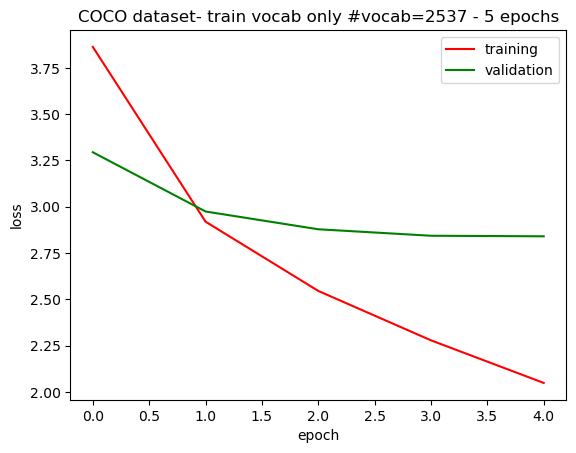

In [115]:
fig = plt.figure()

plt.plot(stats[:,0], 'r', label = 'training', )
plt.plot(stats[:,1], 'g', label = 'validation' )
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title(f"COCO dataset- train vocab only #vocab={len(vocab)} - 5 epochs")
fig.savefig("coco_train_vocab_only.png")
plt.show()

In [ ]:
# save model after training
decoder_ckpt = torch.save(decoder, "coco_subset_assessment_decoder.ckpt")

### 6 Test prediction and evaluation [10 marks] 

#### 6.1 Generate predictions on test data (4 marks)

Display 4 sample test images containing different objects, along with your model’s generated captions and all the reference captions for each.

> Remember that everything **displayed** in the submitted notebook and .html file will be marked, so be sure to run all relevant cells.

In [117]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import os
from PIL import Image
import torchvision.transforms as transforms

class COCOImagesDataset(Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.transform = transform
        self.filenames = os.listdir(directory)

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        img_name = self.filenames[idx]
        img_path = os.path.join(self.directory, img_name)
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, img_name

transform = transforms.Compose([
    transforms.ToTensor(),
])

path_test_file = '/Users/crishnagarkar/comp5625m-artificial-intelligence-2024/test_set/test_set/test_set'
test_dataset = COCOImagesDataset(path_test_file, transform=transform)
test_data_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [119]:
data_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), # using ImageNet norms
                         (0.229, 0.224, 0.225))
])

path_test_file = '/Users/crishnagarkar/comp5625m-artificial-intelligence-2024/test_set/test_set/test_set'
dataset_test = COCOImagesDataset(path_test_file, transform=data_transform)

test_loader = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=32,
    shuffle=False,
    num_workers=0
)

In [120]:
model.eval()
decoder.eval() # generate caption, eval mode to not influence batchnormncoder.eval()

DecoderRNN(
  (resize): Linear(in_features=2048, out_features=256, bias=True)
  (bn): BatchNorm1d(256, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (embed): Embedding(2537, 256)
  (rnn): LSTM(256, 512, batch_first=True)
  (linear): Linear(in_features=512, out_features=2537, bias=True)
)

In [121]:
# getting functions from helperDL.py
from helperDL import timshow
from helperDL import decode_caption

GENERATED: 
a brown bear in a field of grass
REFERENCES:




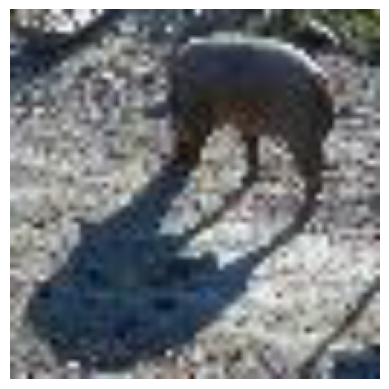

GENERATED: 
a man riding a horse in a field
REFERENCES:




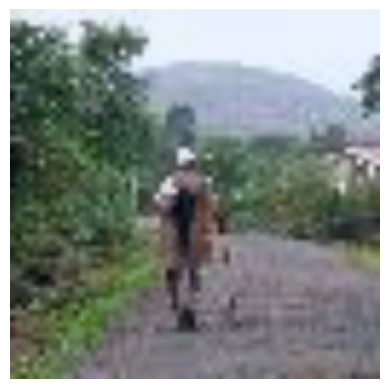

GENERATED: 
a bear is in the wild <unk>
REFERENCES:




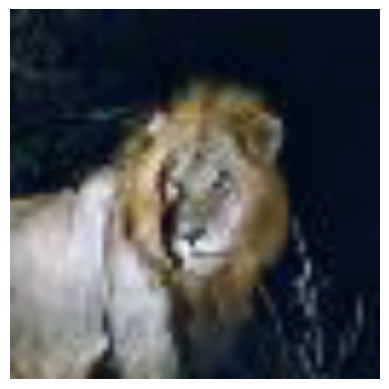

GENERATED: 
a large brown bear sitting on top of a rock
REFERENCES:




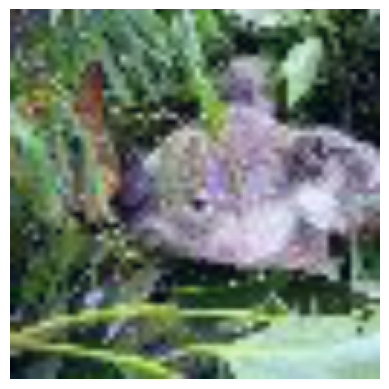

In [134]:
IMAGES_TO_SHOW = 4
idx = 0
with torch.no_grad():
    for i, (image, filename) in enumerate(test_loader):

        # your code here --->
        features = model(image)  # Get features from the image
        sampled_ids = decoder.sample(features)
        sampled_ids = sampled_ids.cpu().numpy()
        generated_caption = decode_caption(sampled_ids[0], vocab)

        print(f"GENERATED: \n{generated_caption}")
        print("REFERENCES:")
        ref = test_set[test_set['file_name'] == filename[0]]['caption']
        print('\n'.join(ref))
        print("===================================\n")

        timshow(image[0].cpu())
        idx += 1
        if idx == IMAGES_TO_SHOW:
            break

#### 6.2 Caption evaluation using cosine similarity (6 marks)

The cosine similarity measures the cosine of the angle between two vectors in n-dimensional space. The smaller the angle, the greater the similarity.

To use the cosine similarity to measure the similarity between the generated caption and the reference captions: 

* Find the embedding vector of each word in the caption 
* Compute the average vector for each caption 
* Compute the cosine similarity score between the average vector of the generated caption and average vector of each reference caption
* Compute the average of these scores 

Calculate the cosine similarity using the model's predictions over the whole test set. 

Display a histogram of the distribution of scores over the test set.

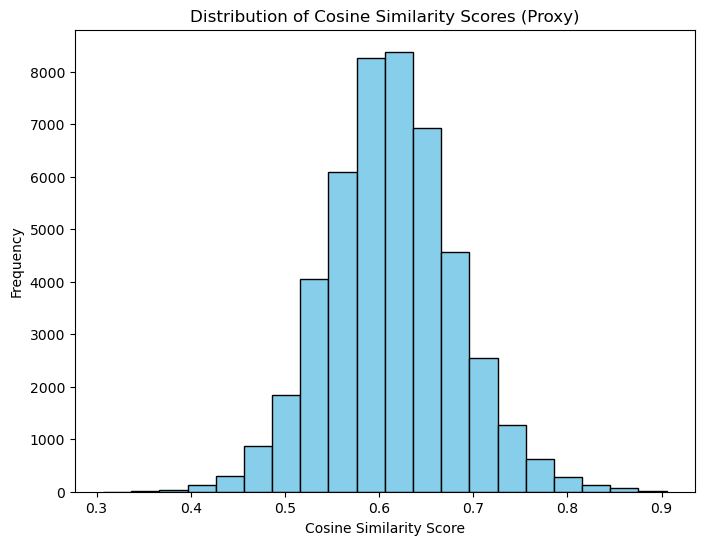

In [131]:


def get_reference_captions(file_name):
    return reference_captions.get(file_name, [])

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device).eval()
decoder = decoder.to(device).eval()

cosine_scores = []

with torch.no_grad():
    for batch_images, batch_filenames in test_loader:
        batch_images = batch_images.to(device)
        batch_features = model(batch_images)

        for i in range(len(batch_features)):
            for j in range(len(batch_features)):
                if i != j:
                    feature_i = batch_features[i].unsqueeze(0).cpu().numpy()
                    feature_j = batch_features[j].unsqueeze(0).cpu().numpy()
                    sim_score = cosine_similarity(feature_i, feature_j)[0][0]
                    cosine_scores.append(sim_score)

plt.figure(figsize=(8, 6))
plt.hist(cosine_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Cosine Similarity Scores (Proxy)')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Frequency')
plt.show()

##### Thank you for completing the assessment - if you have any question, please ask on teams channel or attend lab sessions on Tuesdays and Wednesdays.